# Bronny James Jr. Data Analysis Project
## By Logan Laszewski

### Import Packages

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
from sklearn import preprocessing
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import seaborn as sns
!pip install dmba
from dmba import adjusted_r2_score, AIC_score
from dmba import regressionSummary
import dmba
import scipy.stats as stats

%matplotlib inline

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.api as sma
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 52.5 MB/s eta 0:00:00
Colab environment detected.


## Explore Data

In [2]:
basketball = pd.read_csv("all_seasons.csv")

In [3]:
basketball = basketball.iloc[:,1:]

In [4]:
basketball.head(5)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [5]:
#draft_year, draft_round, draft_number. All listed as "Undrafted" instead of being NAs
basketball.isna().sum()

,0
player_name,0
team_abbreviation,0
age,0
player_height,0
player_weight,0
college,1854
country,0
draft_year,0
draft_round,0
draft_number,0


In [6]:
basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  float64
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   college            10990 non-null  object 
 6   country            12844 non-null  object 
 7   draft_year         12844 non-null  object 
 8   draft_round        12844 non-null  object 
 9   draft_number       12844 non-null  object 
 10  gp                 12844 non-null  int64  
 11  pts                12844 non-null  float64
 12  reb                12844 non-null  float64
 13  ast                12844 non-null  float64
 14  net_rating         12844 non-null  float64
 15  oreb_pct           12844 non-null  float64
 16  dreb_pct           128

In [7]:
basketball.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


## Rename and transform Columns

In [8]:
#rename height and weight variables
basketball = basketball.rename(columns = {"player_height":"height", "player_weight": "weight"})

In [9]:
#transform both height and weight variables
basketball["height"] = basketball["height"] / 2.54
basketball["weight"] = (basketball["weight"] * 2.20462).round(2)
basketball.head(5)

,player_name,team_abbreviation,age,height,weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,76.0,209.0,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,75.0,190.0,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,80.0,228.0,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,80.0,225.0,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,84.0,264.0,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [10]:
#make variables numeric that were objects before
basketball["draft_year"] = pd.to_numeric(basketball["draft_year"], errors="coerce")
basketball["draft_round"] = pd.to_numeric(basketball["draft_round"], errors="coerce")
basketball["draft_number"] = pd.to_numeric(basketball["draft_number"], errors="coerce")
basketball["season_start"] = basketball["season"].str[:4].astype(int)

In [11]:
basketball.draft_year.unique()

array([1996., 1994., 1993., 1989., 1995., 1985., 1988., 1991., 1986.,
       1990., 1984., 1987., 1982., 1992.,   nan, 1983., 1981., 1978.,
       1979., 1980., 1976., 1997., 1998., 1999., 2000., 2001., 2002.,
       2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       1963., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
       2020., 2021., 2022.])

### Clean data by removing values that are errors or not needed for analysis

In [12]:
basketball = basketball[basketball["draft_year"] > 1988]

In [13]:
basketball = basketball[basketball["draft_number"] != "Undrafted"]

## Make a unique identifier

In [14]:
basketball["player_id"] = basketball["player_name"] + "_" + basketball["draft_number"].fillna(-1).astype(int).astype(str)

In [15]:
print(len(basketball['player_id'].unique()))

1669


## Look into players drafted at pick 49 or later...

In [16]:
LatePick = basketball[(basketball["draft_number"] > 49)]

In [17]:
LatePick.head(5)

,player_name,team_abbreviation,age,height,weight,college,country,draft_year,draft_round,draft_number,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,season_start,player_id
45,Fred Hoiberg,IND,24.0,76.0,203.0,Iowa State,USA,1995.0,2.0,52.0,...,0.9,4.9,0.028,0.146,0.172,0.590,0.122,1996-97,1996,Fred Hoiberg_52
103,Chris Robinson,VAN,23.0,77.0,200.0,Western Kentucky,USA,1996.0,2.0,51.0,...,1.6,-11.4,0.039,0.088,0.155,0.486,0.156,1996-97,1996,Chris Robinson_51
116,Cuonzo Martin,MIL,25.0,77.0,213.0,Purdue,USA,1995.0,2.0,57.0,...,0.3,-12.1,0.048,0.000,0.214,0.000,0.100,1996-97,1996,Cuonzo Martin_57
122,Chris Carr,MIN,23.0,78.0,220.0,Southern Illinois,USA,1995.0,2.0,56.0,...,0.9,3.8,0.043,0.116,0.184,0.558,0.099,1996-97,1996,Chris Carr_56
154,Don Reid,DET,23.0,80.0,250.0,Georgetown,USA,1995.0,2.0,58.0,...,0.3,-1.5,0.092,0.159,0.154,0.523,0.053,1996-97,1996,Don Reid_58


In [18]:
LatePick["player_id"].nunique()

171

## Find average career stats

### Career long avg, not weighted for games played

In [19]:
player_avg_stats = LatePick.groupby("player_id")[["pts", "reb", "ast"]].mean().reset_index()
player_avg_stats.describe()

,pts,reb,ast
count,171.000000,171.000000,171.000000
mean,3.673247,1.834932,0.836495
std,2.819117,1.328196,0.902845
min,0.000000,0.000000,0.000000
25%,1.800000,0.992857,0.250000
50%,2.850000,1.500000,0.600000
75%,4.915000,2.458333,1.100595
max,16.000000,9.000000,7.000000


### Career long avg, weighted for games played

In [20]:
LatePick = LatePick.copy()

# Group by player_name to calculate weighted averages
LatePick["total_pts"] = LatePick["pts"] * LatePick["gp"]
LatePick["total_reb"] = LatePick["reb"] * LatePick["gp"]
LatePick["total_ast"] = LatePick["ast"] * LatePick["gp"]
avg_weighted = LatePick.groupby("player_id")[["total_pts", "total_reb", "total_ast", "gp"]].sum().reset_index()
avg_weighted

,player_id,total_pts,total_reb,total_ast,gp
0,AJ Price_52,1521.7,377.6,570.4,261
1,Aaron Wiggins_55,891.0,390.0,147.0,120
2,Abdel Nader_58,928.9,375.9,107.0,202
3,Alec Peters_54,82.0,38.0,12.0,20
4,Alex Acker_60,81.5,30.0,16.5,30
...,...,...,...,...,...
166,Vincent Edwards_52,3.0,2.0,0.0,2
167,Will Blalock_60,25.2,15.4,16.8,14
168,Willie Warren_54,36.1,11.4,26.6,19
169,Zan Tabak_51,644.6,507.2,96.5,143


In [21]:
# Now divide total production by total games played to get a true weighted average
avg_weighted["avgpts"] = (avg_weighted["total_pts"] / avg_weighted["gp"].replace(0, np.nan))
avg_weighted["avgtrbs"] = (avg_weighted["total_reb"] / avg_weighted["gp"].replace(0, np.nan))
avg_weighted["avgasts"] = (avg_weighted["total_ast"] / avg_weighted["gp"].replace(0, np.nan))

# Keep relevant columns
avg_weighted = avg_weighted[["player_id", "avgpts", "avgtrbs", "avgasts"]]

# Display summary statistics
avg_weighted.describe().round(2)

,avgpts,avgtrbs,avgasts
count,171.00,171.00,171.00
mean,3.80,1.90,0.87
std,2.98,1.38,0.93
min,0.00,0.00,0.00
25%,1.83,1.00,0.30
50%,2.87,1.51,0.61
75%,4.89,2.59,1.18
max,17.64,9.00,7.00


### Look at how players avgs change throughout career for 50-60 picks in draft

In [22]:
LatePick['year_of_career'] = LatePick['season_start'] - LatePick['draft_year'] + 1
LatePick.head(5)

,player_name,team_abbreviation,age,height,weight,college,country,draft_year,draft_round,draft_number,...,usg_pct,ts_pct,ast_pct,season,season_start,player_id,total_pts,total_reb,total_ast,year_of_career
45,Fred Hoiberg,IND,24.0,76.0,203.0,Iowa State,USA,1995.0,2.0,52.0,...,0.172,0.590,0.122,1996-97,1996,Fred Hoiberg_52,225.6,79.9,42.3,2.0
103,Chris Robinson,VAN,23.0,77.0,200.0,Western Kentucky,USA,1996.0,2.0,51.0,...,0.155,0.486,0.156,1996-97,1996,Chris Robinson_51,188.6,69.7,65.6,1.0
116,Cuonzo Martin,MIL,25.0,77.0,213.0,Purdue,USA,1995.0,2.0,57.0,...,0.214,0.000,0.100,1996-97,1996,Cuonzo Martin_57,0.0,0.9,0.9,2.0
122,Chris Carr,MIN,23.0,78.0,220.0,Southern Illinois,USA,1995.0,2.0,56.0,...,0.184,0.558,0.099,1996-97,1996,Chris Carr_56,335.5,115.5,49.5,2.0
154,Don Reid,DET,23.0,80.0,250.0,Georgetown,USA,1995.0,2.0,58.0,...,0.154,0.523,0.053,1996-97,1996,Don Reid_58,131.6,98.7,14.1,2.0


In [23]:
# Group by player_id and season_start to calculate total stats (points, rebounds, assists, and games played)
Yearcareer = LatePick.groupby(["player_id", "season_start"])[["total_pts", "total_reb", "total_ast", "gp"]].sum().reset_index()

# Add the 'year_of_career' to the season averages for each player
Yearcareer = Yearcareer.merge(LatePick[['player_id', 'season_start', 'year_of_career']], on=['player_id', 'season_start'], how='left')

Yearcareer

,player_id,season_start,total_pts,total_reb,total_ast,gp,year_of_career
0,AJ Price_52,2009,408.8,89.6,106.4,56,1.0
1,AJ Price_52,2010,325.0,70.0,110.0,50,2.0
2,AJ Price_52,2011,171.6,61.6,88.0,44,3.0
3,AJ Price_52,2012,438.9,114.0,205.2,57,4.0
4,AJ Price_52,2013,44.8,11.2,14.0,28,5.0
...,...,...,...,...,...,...,...
561,Zeljko Rebraca_54,2001,510.6,288.6,37.0,74,8.0
562,Zeljko Rebraca_54,2002,198.0,93.0,9.0,30,9.0
563,Zeljko Rebraca_54,2003,91.2,57.6,7.2,24,10.0
564,Zeljko Rebraca_54,2004,336.4,185.6,23.2,58,11.0


In [24]:
career_totals = Yearcareer.groupby('year_of_career')[['total_pts', 'total_reb', 'total_ast', 'gp']].sum().reset_index()

# Now, calculate the weighted average for points, rebounds, and assists
career_avg_stats = career_totals.copy()

# Calculate the weighted average of points, rebounds, and assists
career_avg_stats['avg_pts'] = round(career_totals['total_pts'] / career_totals['gp'],2)
career_avg_stats['avg_reb'] = round(career_totals['total_reb'] / career_totals['gp'],2)
career_avg_stats['avg_ast'] = round(career_totals['total_ast'] / career_totals['gp'],2)

# Display the result
career_avg_stats

,year_of_career,total_pts,total_reb,total_ast,gp,avg_pts,avg_reb,avg_ast
0,1.0,11464.0,5582.5,2493.0,2836,4.04,1.97,0.88
1,2.0,17058.7,7494.7,3962.0,3101,5.50,2.42,1.28
2,3.0,16723.9,7149.7,3657.3,2692,6.21,2.66,1.36
3,4.0,16688.3,6972.8,3461.5,2335,7.15,2.99,1.48
4,5.0,16012.0,6563.8,3479.5,2118,7.56,3.10,1.64
5,6.0,16071.5,6737.4,3323.6,2150,7.48,3.13,1.55
6,7.0,14033.3,6249.3,2628.5,1835,7.65,3.41,1.43
7,8.0,11244.4,4949.0,2105.0,1389,8.10,3.56,1.52
8,9.0,10737.8,4504.0,2031.9,1255,8.56,3.59,1.62
9,10.0,7918.4,3827.5,1418.3,997,7.94,3.84,1.42


In [25]:
# Group by 'year_of_career' and calculate the mean for pts, reb, and ast
career_avg_stats = LatePick.groupby('year_of_career')[['pts', 'reb', 'ast', 'gp']].mean().round(2).reset_index()

# Display the result
career_avg_stats

,year_of_career,pts,reb,ast,gp
0,1.0,3.26,1.62,0.75,26.02
1,2.0,4.24,2.02,1.00,31.64
2,3.0,4.95,2.20,1.17,37.92
3,4.0,5.71,2.52,1.18,47.65
4,5.0,6.28,2.72,1.33,51.66
5,6.0,6.16,2.63,1.27,48.86
6,7.0,7.04,3.12,1.35,61.17
7,8.0,6.15,2.70,1.17,49.61
8,9.0,6.70,2.88,1.24,50.20
9,10.0,6.58,3.09,1.27,47.48


### Look into how long these players are normally in the NBA for?

In [26]:
# Group by player_id and get the highest year_of_career for each player
highest_year_of_career = LatePick.groupby('player_id')['year_of_career'].max().reset_index()
highest_year_of_career["year_of_career"].value_counts()

,count
year_of_career,
2.0,38
1.0,37
3.0,28
6.0,14
4.0,11
5.0,6
10.0,6
11.0,6
8.0,5


Median NBA Career Length: 3.0 years


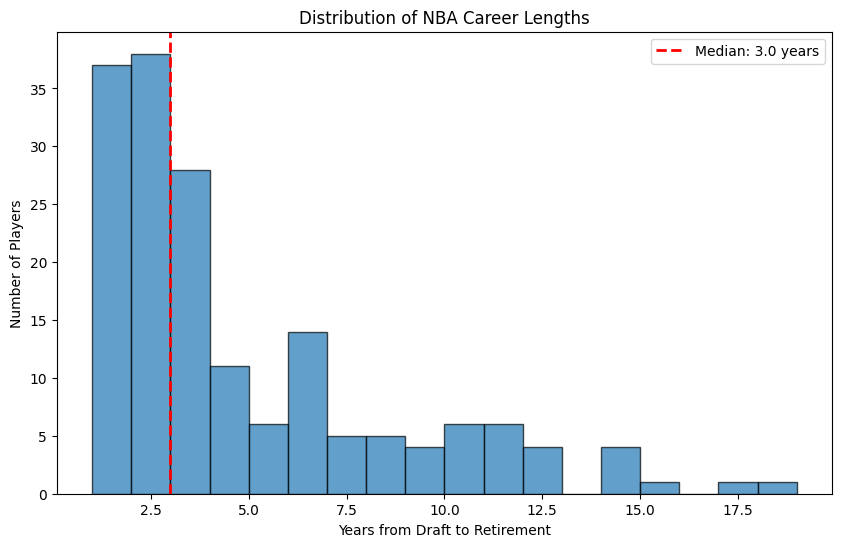

In [27]:
import matplotlib.pyplot as plt

# Calculate the average career length (from draft year to last year played)
median_career_length = round(highest_year_of_career['year_of_career'].median(), 3)
print(f"Median NBA Career Length: {median_career_length} years")

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(highest_year_of_career['year_of_career'], bins=range(1, int(highest_year_of_career['year_of_career'].max()) + 1), edgecolor='black', alpha=0.7)

# Add a vertical line for the median career length
plt.axvline(median_career_length, color='r', linestyle='dashed', linewidth=2, label=f'Median: {median_career_length} years')

# Add labels, title, and legend
plt.xlabel('Years from Draft to Retirement')
plt.ylabel('Number of Players')
plt.title('Distribution of NBA Career Lengths')
plt.legend()

# Show the plot
plt.show()

## Age of the players when they are drafted

## Even when on the court... What is the usage percentage

## Machine Learning (use statistics and attributes to predict draft selection)

### Creating basketballrookie subset to use for modeling

In [28]:
# data set of only rookie stats for drafted players. Will remove the players who were never drafted from dataset

basketball['year_of_career'] = basketball['season_start'] - basketball['draft_year'] + 1
basketballrookie = basketball[(basketball["year_of_career"] == 1) & (basketball["draft_round"].isin([1, 2]))]

In [29]:
basketballrookie.player_id.nunique()

1220

In [30]:
basketballrookie.describe()

,age,height,weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start,year_of_career
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.00000,1220.000000,1220.000000,1220.000000,1220.0
mean,21.738525,78.985246,218.118033,2009.500000,1.391803,25.835246,46.353279,5.695000,2.596230,1.207049,-5.619672,0.057391,0.132512,0.18478,0.491743,0.116334,2009.500000,1.0
std,1.487048,3.404352,26.392771,7.847344,0.488353,15.887057,24.638631,4.201974,1.837108,1.343645,13.412558,0.043432,0.054684,0.04630,0.099336,0.089838,7.847344,0.0
min,18.000000,69.000000,150.000000,1996.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-150.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1996.000000,1.0
25%,21.000000,77.000000,200.000000,2003.000000,1.000000,12.000000,25.000000,2.700000,1.200000,0.400000,-9.000000,0.024000,0.093000,0.15400,0.455000,0.057000,2003.000000,1.0
50%,22.000000,79.000000,215.000000,2010.000000,1.000000,25.000000,48.000000,4.500000,2.100000,0.800000,-4.200000,0.044500,0.125000,0.18200,0.502000,0.089500,2010.000000,1.0
75%,23.000000,81.250000,235.250000,2017.000000,2.000000,38.000000,69.000000,7.800000,3.500000,1.500000,-0.100000,0.088000,0.168000,0.21400,0.541000,0.154000,2017.000000,1.0
max,28.000000,89.000000,343.000000,2022.000000,2.000000,60.000000,82.000000,23.500000,11.900000,8.300000,62.200000,0.400000,0.500000,0.38900,1.064000,1.000000,2022.000000,1.0


In [31]:
basketballrookie = basketballrookie[basketballrookie['gp'] > 3]

In [32]:
basketballrookie.player_id.nunique()

1177

In [33]:
basketballrookie.describe()

,age,height,weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start,year_of_career
count,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.0
mean,21.722175,78.954121,217.948173,2009.485132,1.380629,25.391674,47.969414,5.833305,2.661257,1.238318,-4.952761,0.057509,0.133297,0.185146,0.495048,0.116467,2009.485132,1.0
std,1.476042,3.382317,26.310383,7.837095,0.485748,15.767347,23.559826,4.201210,1.830211,1.353379,9.006614,0.041068,0.051193,0.043533,0.079699,0.083058,7.837095,0.0
min,18.000000,69.000000,150.000000,1996.000000,1.000000,1.000000,4.000000,0.000000,0.100000,0.000000,-61.000000,0.000000,0.000000,0.042000,0.000000,0.000000,1996.000000,1.0
25%,21.000000,77.000000,200.000000,2003.000000,1.000000,12.000000,28.000000,2.800000,1.300000,0.400000,-8.700000,0.025000,0.094000,0.155000,0.457000,0.058000,2003.000000,1.0
50%,22.000000,79.000000,215.000000,2010.000000,1.000000,24.000000,50.000000,4.600000,2.200000,0.800000,-4.100000,0.045000,0.125000,0.182000,0.503000,0.090000,2010.000000,1.0
75%,23.000000,81.000000,235.000000,2017.000000,2.000000,38.000000,70.000000,7.900000,3.600000,1.600000,-0.200000,0.088000,0.168000,0.213000,0.541000,0.154000,2017.000000,1.0
max,28.000000,89.000000,343.000000,2022.000000,2.000000,60.000000,82.000000,23.500000,11.900000,8.300000,38.900000,0.400000,0.375000,0.389000,0.799000,0.419000,2022.000000,1.0


### Set up training and testing split

In [34]:
#look at all players who were drafted (1-60)
#use variables to determine outcome of draft position
#given there age when drafted, pts , rebounds, assists,

predictors = ['gp', 'pts', 'reb', 'usg_pct', 'ts_pct']
outcome = 'draft_number'

X = basketballrookie[predictors]
y = basketballrookie[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

### P values (looking for variable importance)

In [35]:
basketballpvals = sm.ols('draft_number ~ pts + gp + usg_pct + ts_pct + reb', data=basketballrookie).fit()
print(basketballpvals.summary())

#['age', 'height', 'weight', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']

                            OLS Regression Results                            
Dep. Variable:           draft_number   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     134.2
Date:                Mon, 02 Jun 2025   Prob (F-statistic):          1.51e-112
Time:                        12:45:33   Log-Likelihood:                -4649.1
No. Observations:                1177   AIC:                             9310.
Df Residuals:                    1171   BIC:                             9341.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.9698      3.429     13.116      0.0

In [36]:
# Drop the constant column, Now calculate the VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
   Feature        VIF
0       gp   8.890675
1      pts   7.980233
2      reb   6.918070
3  usg_pct  13.783181
4   ts_pct  18.547727


### Linear Regression Model

In [37]:
rookie_lm = LinearRegression()
rookie_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', rookie_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': rookie_lm.coef_}))

#print performance measures
regressionSummary(train_y, rookie_lm.predict(train_X))

regressionSummary(valid_y, rookie_lm.predict(valid_X))

intercept  40.899077636716385
  Predictor  coefficient
0        gp    -0.205191
1       pts    -0.954353
2       reb    -1.363728
3   usg_pct   -36.135838
4    ts_pct    21.162198

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 12.4476
            Mean Absolute Error (MAE) : 10.0211
          Mean Percentage Error (MPE) : -63.1871
Mean Absolute Percentage Error (MAPE) : 93.7469

Regression statistics

                      Mean Error (ME) : -0.8451
       Root Mean Squared Error (RMSE) : 12.9027
            Mean Absolute Error (MAE) : 10.3987
          Mean Percentage Error (MPE) : -52.0419
Mean Absolute Percentage Error (MAPE) : 86.2109


### Check how often players draft prediction is within 20 picks

In [38]:
# Calculate the absolute difference between the predicted and actual draft numbers
abs_diff = np.abs(valid_y - rookie_lm.predict(valid_X))

# Define the range (e.g., within 5 picks)
success_within_20 = np.sum(abs_diff <= 20) / len(valid_y) * 100

print(f"Percentage of predictions within 20 picks: {success_within_20}%")

Percentage of predictions within 20 picks: 86.15819209039547%


### Backward elimination to find best combination of predictors

In [39]:
# partition the data into training (60%) and validation (40%) sets
#using all of the predictors
predictors = [ 'gp', 'pts', 'reb', 'ast', 'dreb_pct', 'usg_pct', 'ts_pct']
outcome = 'draft_number'

X = basketballrookie[predictors]
y = basketballrookie[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [40]:
# backward elimination

def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)
print(best_variables)

Variables: gp, pts, reb, ast, dreb_pct, usg_pct, ts_pct
Start: score=5604.09
Step: score=5602.47, remove dreb_pct
Step: score=5601.38, remove ast
Step: score=5601.38, remove None
['gp', 'pts', 'reb', 'usg_pct', 'ts_pct']


### Now, Random Forest Model to catch nonlinear relationships

In [41]:
predictors = ['age', 'height', 'weight', 'gp', 'pts', 'reb', 'ast',
              'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
outcome = 'draft_number'

X = basketballrookie[predictors]
y = basketballrookie[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
rf_model = RandomForestRegressor(n_estimators=100,max_depth=6, random_state=42, min_samples_leaf = 4,
        min_samples_split = 10 ,min_weight_fraction_leaf = 0.0,bootstrap = True, criterion = 'absolute_error')  # You can adjust n_estimators and other parameters


rf_model.fit(train_X, train_y)

train_predictions = rf_model.predict(train_X)
valid_predictions = rf_model.predict(valid_X)


# Round the predictions to the nearest whole number
train_predictions_rounded = np.round(train_predictions)
valid_predictions_rounded = np.round(valid_predictions)

# Print performance on the training set
train_rmse = np.sqrt(mean_squared_error(train_y, train_predictions_rounded))
train_mae = mean_absolute_error(train_y, train_predictions_rounded)
print("Training RMSE: ", train_rmse)
print("Training MAE: ", train_mae)

# Print performance on the validation set
valid_rmse = np.sqrt(mean_squared_error(valid_y, valid_predictions_rounded))
valid_mae = mean_absolute_error(valid_y, valid_predictions_rounded)
print("Validation RMSE: ", valid_rmse)
print("Validation MAE: ", valid_mae)

Training RMSE:  10.126058440394003
Training MAE:  7.817739975698664
Validation RMSE:  12.250792664311758
Validation MAE:  9.51129943502825


### Check how often players draft prediction is within 20 picks

In [43]:
# Make predictions and round them to the nearest whole number
valid_predictions_rounded = np.round(rf_model.predict(valid_X))

# Calculate the absolute difference between the predicted and actual draft numbers
abs_diff = np.abs(valid_y - valid_predictions_rounded)

# Define the range (e.g., within 5 picks)
success_within_20 = np.sum(abs_diff <= 20) / len(valid_y) * 100

print(f"Percentage of predictions within 20 picks: {success_within_20}%")

Percentage of predictions within 20 picks: 88.98305084745762%


### Look at examples of predicted draft pick vs actual to see if outcome is intuitive

In [44]:
# Generate predictions on the full dataset
all_predictions = rf_model.predict(X)
all_predictions_rounded = np.round(all_predictions)

# Add predictions as a new column in the original DataFrame
basketballrookie_with_preds = basketballrookie.copy()
basketballrookie_with_preds['predicted_draft_pick'] = all_predictions_rounded

In [45]:
basketballrookie1 = basketballrookie_with_preds[basketballrookie_with_preds["draft_year"] == 2019]

In [46]:
basketballrookie1.head(5)

,player_name,team_abbreviation,age,height,weight,college,country,draft_year,draft_round,draft_number,...,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,season_start,player_id,year_of_career,predicted_draft_pick
10638,Jalen McDaniels,CHA,22.0,82.0,205.0,San Diego State,USA,2019.0,2.0,52.0,...,0.050,0.172,0.131,0.574,0.069,2019-20,2019,Jalen McDaniels_52,1.0,36.0
10659,Jaylen Nowell,MIN,20.0,76.0,201.0,Washington,USA,2019.0,2.0,43.0,...,0.016,0.065,0.165,0.471,0.194,2019-20,2019,Jaylen Nowell_43,1.0,40.0
10662,Jaxson Hayes,NOP,20.0,83.0,220.0,Texas-Austin,USA,2019.0,1.0,8.0,...,0.085,0.140,0.146,0.689,0.074,2019-20,2019,Jaxson Hayes_8,1.0,13.0
10665,Jarrett Culver,MIN,21.0,78.0,195.0,Texas Tech,USA,2019.0,1.0,6.0,...,0.041,0.092,0.187,0.467,0.105,2019-20,2019,Jarrett Culver_6,1.0,14.0
10667,Jarrell Brantley,UTA,24.0,77.0,250.0,College of Charleston,USA,2019.0,2.0,50.0,...,0.019,0.189,0.155,0.416,0.193,2019-20,2019,Jarrell Brantley_50,1.0,42.0


### Grid Search to find best parameter choices for Random Forest

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'absolute_error'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Search with RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, random_state=42)
random_search.fit(train_X, train_y)

# Get best parameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Use the best model
best_rf = random_search.best_estimator_

Best hyperparameters: {'n_estimators': 100, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 8, 'criterion': 'absolute_error', 'bootstrap': True}


## Take Bronnys stats for his rookie season and look at when he "should" be drafted

In [48]:
#20 yrs, 6.2 (74 inches), 209 ibs, 27 games, 2.3 pts , 0.7 rebs , 0.8 asts , .021 oreb_pct , .076 dreb_pct, .199 usg_pct, .424 ts_pct , .191 ast_pct,

In [49]:
#['age', 'height', 'weight', 'gp', 'pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
# Bronny James Jr. stats for rookie season

input_data = np.array([[20, 6.2, 209, 27, 2.3, 0.7, 0.8, 0.021, 0.076, 0.199, 0.424, 0.191]])

# Make prediction
draft_pick_prediction = rf_model.predict(input_data)

# Output the prediction
print(f"Predicted Draft Pick: {draft_pick_prediction[0].round()}")

Predicted Draft Pick: 35.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## PCA. To see the difference between 1st round and 2nd round picks

Based on the statistics and player info: 'age', 'height', 'weight', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'

In [50]:
basketballrookie.draft_round.value_counts()

,count
draft_round,
1.0,729
2.0,448


In [51]:
predictors = list(basketballrookie.columns)

variables = ['player_name','team_abbreviation','college','country','draft_year','draft_round','draft_number',
             'season','season_start','player_id','year_of_career']
for x in variables:
    predictors.remove(x)
    x

print(predictors)

outcome = "draft_round"

['age', 'height', 'weight', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']


In [52]:
basketballrookie[predictors].corr()

,age,height,weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,-0.094531,0.016971,-0.116980,-0.230592,-0.204528,-0.130541,0.026145,0.021988,-0.092290,-0.124410,-0.072299,-0.022301
height,-0.094531,1.000000,0.770343,-0.042019,-0.106447,0.349761,-0.475744,-0.017138,0.585453,0.624975,-0.183688,0.096453,-0.674384
weight,0.016971,0.770343,1.000000,-0.035660,-0.098118,0.315659,-0.429614,-0.009778,0.625163,0.592740,-0.137933,0.112390,-0.591667
gp,-0.116980,-0.042019,-0.035660,1.000000,0.621035,0.552584,0.437171,0.192913,-0.046267,0.005601,-0.030223,0.319959,0.119696
pts,-0.230592,-0.106447,-0.098118,0.621035,1.000000,0.702996,0.667304,0.099282,-0.120372,-0.018216,0.366588,0.352861,0.252532
reb,-0.204528,0.349761,0.315659,0.552584,0.702996,1.000000,0.277292,0.122242,0.365249,0.506444,0.026195,0.349852,-0.122070
ast,-0.130541,-0.475744,-0.429614,0.437171,0.667304,0.277292,1.000000,0.065595,-0.362861,-0.270686,0.233937,0.089078,0.755038
net_rating,0.026145,-0.017138,-0.009778,0.192913,0.099282,0.122242,0.065595,1.000000,0.108780,0.049767,-0.132277,0.228387,0.008581
oreb_pct,0.021988,0.585453,0.625163,-0.046267,-0.120372,0.365249,-0.362861,0.108780,1.000000,0.611718,-0.082480,0.105751,-0.467515
dreb_pct,-0.092290,0.624975,0.592740,0.005601,-0.018216,0.506444,-0.270686,0.049767,0.611718,1.000000,-0.124810,0.135099,-0.415724


### Summary table of variance

In [53]:
predictors = ['age', 'height', 'gp', 'pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'usg_pct','ast_pct']

In [54]:
# Components
pcs = PCA()
pcs.fit(preprocessing.scale(basketballrookie[predictors]))

pcs_Summary = pd.DataFrame({'Standard Deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of Variance': pcs.explained_variance_ratio_,
                           'Cumulative Proportion': np.cumsum(pcs.explained_variance_ratio_)})

pcs_Summary = pcs_Summary.transpose()

pcs_Summary.columns = ['PC{}'.format(i) for i in range(1,len(pcs_Summary.columns) + 1)]
pcs_Summary.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Standard Deviation,1.85,1.65,1.03,0.95,0.82,0.64,0.56,0.54,0.37,0.24
Proportion of Variance,0.34,0.27,0.11,0.09,0.07,0.04,0.03,0.03,0.01,0.01
Cumulative Proportion,0.34,0.62,0.72,0.81,0.88,0.92,0.95,0.98,0.99,1.00


### How much each original variable contributes to each principal component

In [55]:
pcs_Components = pd.DataFrame(pcs.components_.transpose(),columns = pcs_Summary.columns,
                             index = predictors)

pcs_Components.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
age,-0.04,-0.21,-0.50,0.81,-0.15,-0.18,-0.00,0.05,0.00,0.00
height,-0.43,0.22,0.07,-0.05,-0.11,-0.27,-0.22,0.78,0.11,0.06
gp,0.18,0.41,-0.42,-0.12,-0.30,0.43,0.52,0.26,-0.02,-0.01
pts,0.28,0.47,0.03,0.07,-0.26,-0.20,-0.30,-0.19,-0.18,0.66
reb,-0.03,0.57,-0.10,0.07,0.04,-0.17,-0.16,-0.31,0.56,-0.44
ast,0.45,0.22,-0.07,0.07,0.35,-0.09,-0.26,0.25,-0.54,-0.44
oreb_pct,-0.37,0.22,0.10,0.31,0.27,0.72,-0.31,-0.05,-0.10,0.11
dreb_pct,-0.35,0.31,0.09,0.14,0.45,-0.33,0.59,-0.14,-0.26,0.13
usg_pct,0.20,0.08,0.73,0.43,-0.35,0.07,0.24,0.10,0.01,-0.20
ast_pct,0.45,-0.05,0.06,0.14,0.54,0.07,0.10,0.29,0.51,0.34


### Make data set of scores, player_ids, draft_round and number

In [56]:
scores = pd.DataFrame(pcs.transform(preprocessing.scale(basketballrookie[predictors])),
                             columns = pcs_Summary.columns)

scores['player_id'] = basketballrookie['player_id'].values

In [57]:
scores = scores.merge(basketballrookie[['player_id', 'draft_round', 'draft_number']], on='player_id', how='left')
scores.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,player_id,draft_round,draft_number
0,1.969037,-0.912010,-0.785564,-0.124810,0.601706,0.831931,0.037291,0.623105,0.313711,-0.057553,Randy Livingston_42,2.0,42.0
1,-1.684123,1.892292,0.649249,0.272350,0.045995,0.493255,1.024963,0.493510,0.037082,-0.168119,Erick Dampier_10,1.0,10.0
2,-2.434996,-0.672962,-0.181890,1.778230,0.597918,0.828830,-0.024752,0.184063,-0.419811,0.179421,Jerome Williams_26,1.0,26.0
3,-0.859666,0.220761,-0.321200,0.825436,-0.693079,0.478983,0.615015,0.567288,-0.066157,0.060135,John Wallace_18,1.0,18.0
4,-2.106174,1.105308,1.826133,-1.683824,0.285357,0.464572,0.388050,0.137353,-0.298157,-0.030046,Jermaine O'Neal_17,1.0,17.0


### Graph for PC1 and PC2 (account for 60% of variance)

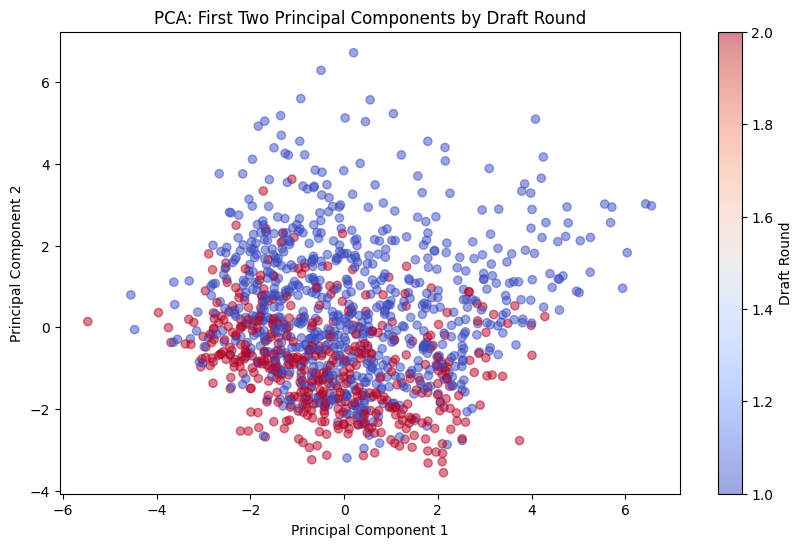

In [58]:
# Create a color map based on the draft_round (1 = first round, 2 = second round)
plt.figure(figsize=(10, 6))
plt.scatter(scores["PC1"], scores["PC2"],
            c=scores["draft_round"], cmap="coolwarm", alpha=0.5)

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: First Two Principal Components by Draft Round")

# Create a colorbar to indicate what each color represents
plt.colorbar(label="Draft Round")

# Show the plot
plt.show()

## PCA. To see the difference between top 50 picks and bottom 10 picks

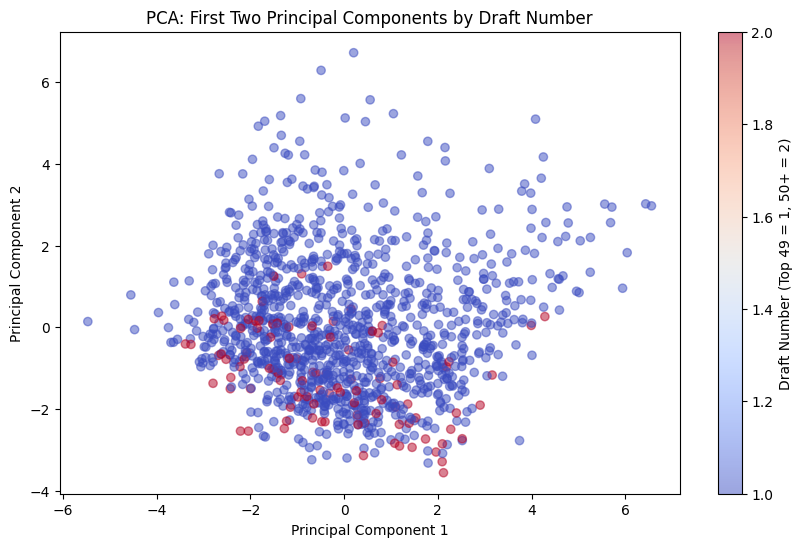

In [59]:
# Create a color map based on the draft_number (top 49 picks as one color, 50+ picks as another color)
scores['draft_color'] = scores['draft_number'].apply(lambda x: 1 if x <= 49 else 2)

# Plotting with color based on draft_number
plt.figure(figsize=(10, 6))
plt.scatter(scores["PC1"], scores["PC2"],
            c=scores["draft_color"], cmap="coolwarm", alpha=0.5)

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: First Two Principal Components by Draft Number")

# Create a colorbar to indicate what each color represents
plt.colorbar(label="Draft Number (Top 49 = 1, 50+ = 2)")

# Show the plot
plt.show()

### T-tests to show that PCs are different for 1st and 2nd round picks

PC1 is influenced by assists (ast, ast_pct), usage (usg_pct), height, weight, rebounding (oreb_pct, dreb_pct).
PC2 is strongly related to points (pts), rebounds (reb), games played (gp).
PC3 is heavily weighted by net rating (net_rating), true shooting percentage (ts_pct), and age.
PC5 has a strong influence from age, height, and net rating.

### Conclusion
Since these PCs differ significantly between first- and second-round players,
it implies that the underlying variables contributing to these PCs also differ.

In [60]:
# Separate players by draft round
first_round = scores[scores['draft_round'] == 1]
second_round = scores[scores['draft_round'] == 2]

# List of principal components
pcs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

# Perform t-tests for each principal component
for pc in pcs:
    t_stat, p_value = stats.ttest_ind(first_round[pc], second_round[pc], equal_var=False)  # Welch's t-test
    print(f"T-test for {pc}: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")

T-test for PC1: t-stat = 5.4103, p-value = 0.0000
T-test for PC2: t-stat = 17.4084, p-value = 0.0000
T-test for PC3: t-stat = 2.7994, p-value = 0.0052
T-test for PC4: t-stat = -6.0871, p-value = 0.0000
T-test for PC5: t-stat = -4.7638, p-value = 0.0000


### P values (looking for variable importance)

In [61]:
basketballpvals = sm.ols('draft_number ~ PC1 + PC2 + PC3 + PC4 + PC5', data=scores).fit()
print(basketballpvals.summary())

                            OLS Regression Results                            
Dep. Variable:           draft_number   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     180.7
Date:                Mon, 02 Jun 2025   Prob (F-statistic):          1.14e-142
Time:                        12:47:25   Log-Likelihood:                -4579.1
No. Observations:                1177   AIC:                             9170.
Df Residuals:                    1171   BIC:                             9201.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.3917      0.346     73.382      0.0

### Run new model using PCA

In [62]:
predictors = ["PC1","PC2","PC3","PC4","PC5"]
outcome = 'draft_number'

In [63]:
# partition data
X = scores[predictors]
y = scores[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [64]:
rookiePCA_lm = LinearRegression()
rookiePCA_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', rookiePCA_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': rookiePCA_lm.coef_}))

#print performance measures
regressionSummary(train_y, rookiePCA_lm.predict(train_X))


#print performance measures
regressionSummary(valid_y, rookiePCA_lm.predict(valid_X))


intercept  25.645457465733195
  Predictor  coefficient
0       PC1    -1.883139
1       PC2    -5.443540
2       PC3    -1.206788
3       PC4     2.936166
4       PC5     2.953356

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 11.8697
            Mean Absolute Error (MAE) : 9.5802
          Mean Percentage Error (MPE) : -52.9479
Mean Absolute Percentage Error (MAPE) : 88.2484

Regression statistics

                      Mean Error (ME) : -0.8438
       Root Mean Squared Error (RMSE) : 11.8075
            Mean Absolute Error (MAE) : 9.5048
          Mean Percentage Error (MPE) : -43.4902
Mean Absolute Percentage Error (MAPE) : 75.8558


In [65]:
# Calculate the absolute difference between the predicted and actual draft numbers
abs_diff = np.abs(valid_y - rookiePCA_lm.predict(valid_X))

# Define the range (e.g., within 5 picks)
success_within_20 = np.sum(abs_diff <= 20) / len(valid_y) * 100

print(f"Percentage of predictions within 20 picks: {success_within_20}%")

Percentage of predictions within 20 picks: 89.26553672316385%


## Use KNN to see 3 closest players to Bronny James (Rookie Season Stats)

In [66]:
 basketballrookie.head(5)

,player_name,team_abbreviation,age,height,weight,college,country,draft_year,draft_round,draft_number,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,season_start,player_id,year_of_career
0,Randy Livingston,HOU,22.0,76.0,209.0,Louisiana State,USA,1996.0,2.0,42.0,...,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,1996,Randy Livingston_42,1.0
38,Erick Dampier,IND,21.0,83.0,265.0,Mississippi State,USA,1996.0,1.0,10.0,...,-2.0,0.107,0.216,0.218,0.451,0.074,1996-97,1996,Erick Dampier_10,1.0
50,Jerome Williams,DET,24.0,81.0,206.0,Georgetown,USA,1996.0,1.0,26.0,...,3.0,0.144,0.182,0.181,0.419,0.071,1996-97,1996,Jerome Williams_26,1.0
67,John Wallace,NYK,23.0,81.0,225.0,Syracuse,USA,1996.0,1.0,18.0,...,2.7,0.080,0.148,0.204,0.571,0.081,1996-97,1996,John Wallace_18,1.0
72,Jermaine O'Neal,POR,18.0,83.0,226.0,NaN,USA,1996.0,1.0,17.0,...,1.3,0.099,0.198,0.199,0.494,0.030,1996-97,1996,Jermaine O'Neal_17,1.0


In [67]:
basketballrookie.columns

Index(['player_name', 'team_abbreviation', 'age', 'height', 'weight',
       'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'gp',
       'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct',
       'ts_pct', 'ast_pct', 'season', 'season_start', 'player_id',
       'year_of_career'],
      dtype='object')

In [68]:
# Column names based on the list provided
columns = ['player_name', 'team_abreviation', 'age', 'height', 'weight', 'College', 'country',
           'draft_year', 'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
           'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season', 'season_start',
           'player_id', 'year_of_career']

# Data for Bronny James Jr.
new_data = np.array([["Bronny James Jr", "LAL", 20, 74, 209, "None", "USA", 2024.0, 2.0, 55,
                      27, 2.3, 0.7, 0.8, np.nan, 0.021, 0.076, 0.199, 0.424, 0.191,
                      "2024-25", 2024, "Bronny James Jr_55", 1.0]])

# Creating the DataFrame
bronny_df = pd.DataFrame(new_data, columns=columns)

In [69]:
bronny_df

,player_name,team_abreviation,age,height,weight,College,country,draft_year,draft_round,draft_number,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,season_start,player_id,year_of_career
0,Bronny James Jr,LAL,20,74,209,None,USA,2024.0,2.0,55,...,nan,0.021,0.076,0.199,0.424,0.191,2024-25,2024,Bronny James Jr_55,1.0


In [70]:
# Split the data into trainData and validData using 70% and 30% split
trainData, validData = train_test_split(basketballrookie, test_size = 0.3, random_state = 7)

In [71]:
variables = basketballrookie.columns.tolist()
variables = [col for col in variables if col not in ['player_name', 'team_abbreviation', 'player_id', 'year_of_career', 'college', 'country', 'draft_year','draft_number', 'draft_round', 'draft_pick',"season","season_start","net_rating","draft_bin"]]

scaler = preprocessing.StandardScaler()
scaler.fit(trainData[variables])

basketballrookieNorm = pd.DataFrame(scaler.transform(basketballrookie[variables]),columns=variables)

In [72]:
norm_newData = scaler.transform(bronny_df[variables])

In [73]:
nn = NearestNeighbors(n_neighbors=3)  # Find the 3 nearest neighbors
nn.fit(basketballrookieNorm)
distances, indices = nn.kneighbors(norm_newData)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [74]:
distances

array([[1.29139384, 1.42251004, 1.52771744]])

In [75]:
indices

array([[632, 976, 195]])

In [76]:
similar_players = basketballrookie.iloc[indices[0]]
similar_players

,player_name,team_abbreviation,age,height,weight,college,country,draft_year,draft_round,draft_number,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,season_start,player_id,year_of_career
6771,Josh Selby,MEM,21.0,74.0,183.0,Kansas,USA,2011.0,2.0,49.0,...,-7.8,0.010,0.065,0.202,0.403,0.197,2011-12,2011,Josh Selby_49,1.0
10659,Jaylen Nowell,MIN,20.0,76.0,201.0,Washington,USA,2019.0,2.0,43.0,...,1.2,0.016,0.065,0.165,0.471,0.194,2019-20,2019,Jaylen Nowell_43,1.0
2059,DeShawn Stevenson,UTA,20.0,77.0,210.0,NaN,USA,2000.0,1.0,23.0,...,-3.0,0.037,0.073,0.202,0.413,0.105,2000-01,2000,DeShawn Stevenson_23,1.0


In [77]:


#Josh Selby drafted 49th overall. only lasted 2 seasons in the league. Though he was a top national prospect coming out of hs and played with Kansas
#along with earning co-MVP honors with Damian Lillard in the 2012 NBA Summer League. Went on to play internationally for about 8 years

#Jaylen Nowell drafted 43rd overall. has been in the league since 2019 (when he got drafted). Has only averaged over 8 points per game on his career. Getting a solid role bench of around 15 mpg over the years.

#DeShawn Stevenson drafted 23rd overall. had 13 seasons in the NBA. Averaging over 10+ ppg in multiple seasons and starting in all 82 games in multiple seasons

In [78]:
similar_players1 = basketballrookieNorm.iloc[indices[0]]
similar_players1

,age,height,weight,gp,pts,reb,ast,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
632,-0.531192,-1.418923,-1.273457,-0.829765,-0.859902,-1.178915,-0.134133,-1.096405,-1.323220,0.394838,-1.153699,0.913391
976,-1.208976,-0.831807,-0.597946,-1.376352,-0.500615,-0.958091,0.009981,-0.952457,-1.323220,-0.485210,-0.301562,0.877885
195,-1.208976,-0.538249,-0.260191,-0.325224,-0.883854,-1.068503,-0.566476,-0.448637,-1.166358,0.394838,-1.028385,-0.175442


### PCA based on average stats instead of only rookie season

In [79]:
# First, get rookie-season physical attributes
rookie_physicals = (
    basketball.sort_values('season_start')  # Ensures rookie season comes first
    .groupby('player_id')
    .first()[['age', 'height', 'weight', 'gp', "draft_round", "draft_number","draft_year"]]
    .reset_index()
)

# Then calculate weighted averages across all seasons
performance_vars = ['pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']

# First, calculate total GP per player
gp_total = basketball.groupby('player_id')['gp'].sum().reset_index(name='total_gp')

# Then calculate weighted averages for each stat
for var in performance_vars:
    basketball[f'{var}_weighted'] = basketball[var] * basketball['gp']

weighted_stats = (
    basketball.groupby('player_id')[[f'{var}_weighted' for var in performance_vars]].sum()
    .join(gp_total.set_index('player_id'))
)

# Final weighted averages
for var in performance_vars:
    weighted_stats[f'{var}_avg'] = weighted_stats[f'{var}_weighted'] / weighted_stats['total_gp']

# Keep only the final averages
final_stats = weighted_stats[[f'{var}_avg' for var in performance_vars]].reset_index()

# Now merge rookie physicals with final weighted averages
final_player_data = pd.merge(rookie_physicals, final_stats, on='player_id')

In [80]:
final_player_data.tail(5)

,player_id,age,height,weight,gp,draft_round,draft_number,draft_year,pts_avg,reb_avg,ast_avg,oreb_pct_avg,dreb_pct_avg,usg_pct_avg,ts_pct_avg,ast_pct_avg
1664,Zhou Qi_43,22.0,85.0,210.0,18,2.0,43.0,2016.0,1.242105,1.136842,0.094737,0.039789,0.109895,0.171947,0.332105,0.026526
1665,Ziaire Williams_10,20.0,81.0,185.0,62,1.0,10.0,2021.0,7.203030,2.100000,0.962626,0.021111,0.083707,0.156707,0.541061,0.070970
1666,Zion Williamson_1,19.0,78.0,284.0,24,1.0,1.0,2019.0,25.798246,6.959649,3.592105,0.077974,0.131746,0.288096,0.642816,0.184412
1667,Zoran Planinic_22,21.0,79.0,195.0,49,1.0,22.0,2003.0,3.765541,1.320946,1.094595,0.035297,0.118804,0.210257,0.488311,0.212196
1668,Zydrunas Ilgauskas_20,23.0,87.0,260.0,82,1.0,20.0,1996.0,13.027165,7.341637,1.147212,0.124595,0.189801,0.230410,0.532502,0.071925


In [104]:
final_player_data = final_player_data[final_player_data["draft_year"] < 2021]

In [105]:
predictors = [ 'pts_avg', 'reb_avg', 'ast_avg', 'oreb_pct_avg', 'dreb_pct_avg', 'usg_pct_avg', 'ts_pct_avg', 'ast_pct_avg']

In [106]:
# Components
pcs = PCA()
pcs.fit(preprocessing.scale(final_player_data[predictors]))

pcs_Summary = pd.DataFrame({'Standard Deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of Variance': pcs.explained_variance_ratio_,
                           'Cumulative Proportion': np.cumsum(pcs.explained_variance_ratio_)})

pcs_Summary = pcs_Summary.transpose()

pcs_Summary.columns = ['PC{}'.format(i) for i in range(1,len(pcs_Summary.columns) + 1)]
pcs_Summary.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Standard Deviation,1.73,1.57,0.93,0.82,0.69,0.57,0.35,0.23
Proportion of Variance,0.38,0.31,0.11,0.08,0.06,0.04,0.02,0.01
Cumulative Proportion,0.38,0.68,0.79,0.88,0.94,0.98,0.99,1.00


In [107]:
pcs_Components = pd.DataFrame(pcs.components_.transpose(),columns = pcs_Summary.columns,
                             index = predictors)

pcs_Components.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
pts_avg,0.46,0.30,-0.04,0.12,-0.42,-0.23,-0.21,0.64
reb_avg,0.14,0.57,-0.00,-0.18,-0.32,-0.05,0.62,-0.36
ast_avg,0.53,0.01,0.07,-0.40,0.04,-0.17,-0.53,-0.51
oreb_pct_avg,-0.31,0.41,-0.13,-0.15,0.50,-0.65,-0.08,0.12
dreb_pct_avg,-0.17,0.51,-0.20,-0.27,0.12,0.67,-0.32,0.14
usg_pct_avg,0.34,0.07,-0.68,0.54,0.28,0.07,0.04,-0.20
ts_pct_avg,0.20,0.31,0.69,0.47,0.37,0.14,-0.03,-0.06
ast_pct_avg,0.46,-0.20,0.01,-0.42,0.49,0.14,0.43,0.36


In [108]:
scores = pd.DataFrame(pcs.transform(preprocessing.scale(final_player_data[predictors])),
                             columns = pcs_Summary.columns)

scores['player_id'] = final_player_data['player_id'].values

In [109]:
scores = scores.merge(final_player_data[['player_id', 'draft_round', 'draft_number']], on='player_id', how='left')
scores.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,player_id,draft_round,draft_number
0,-3.795933,0.388439,-2.412677,-1.865150,-0.211004,-1.095677,-0.490534,0.123973,A.J. Bramlett_39,2.0,39.0
1,0.954992,-2.165571,-0.026817,0.085111,0.459970,-0.100149,0.444193,0.155804,A.J. Guyton_32,2.0,32.0
2,-1.847128,-0.187422,-0.200767,0.165806,-0.063798,1.057568,-0.573812,-0.040662,AJ Hammons_46,2.0,46.0
3,1.203902,-1.746876,-0.147775,-0.135144,0.589728,0.295550,0.325329,0.101894,AJ Price_52,2.0,52.0
4,2.039443,-1.416248,-0.038441,0.282441,0.467357,-0.223266,0.013569,0.094536,Aaron Brooks_26,1.0,26.0


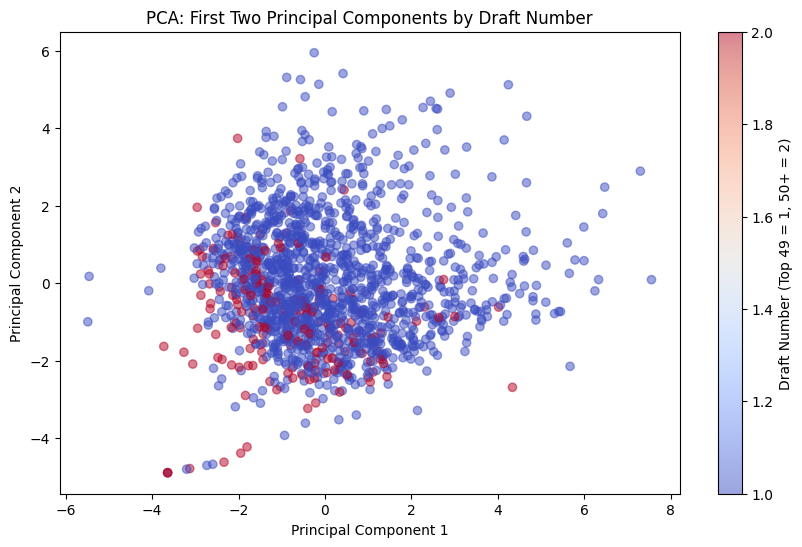

In [110]:
# Create a color map based on the draft_number (top 49 picks as one color, 50+ picks as another color)
scores['draft_color'] = scores['draft_number'].apply(lambda x: 1 if x <= 49 else 2)

# Plotting with color based on draft_number
plt.figure(figsize=(10, 6))
plt.scatter(scores["PC1"], scores["PC2"],
            c=scores["draft_color"], cmap="coolwarm", alpha=0.5)

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: First Two Principal Components by Draft Number")

# Create a colorbar to indicate what each color represents
plt.colorbar(label="Draft Number (Top 49 = 1, 50+ = 2)")

# Show the plot
plt.show()

In [91]:

#Look at since 1989 when there have only been 2 rounds in the draft
#https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats?select=Player+Season+Info.csv